In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
n_iters = 10_000
n_total_samples = 18_300
n_top_samples = 11
luck_influence = 0.05

skill_index, luck_index = 0, 1

n_common_indices_vals = []
mean_luck_score_vals = []

for _ in range(n_iters):
    # Indices: skill score, luck score.
    skill_luck_scores = np.random.rand(n_total_samples, 2)  # [N,2]
    combined_scores = (
        (1 - luck_influence) * skill_luck_scores[:, skill_index] +
        luck_influence * skill_luck_scores[:, luck_index]
    )  # [N,]

    order_without_luck_top = np.argsort(
        -skill_luck_scores[:, skill_index], kind='stable'
    )[:n_top_samples]
    order_with_luck_top = np.argsort(
        -combined_scores, kind='stable'
    )[:n_top_samples]

    n_common_indices = len(
        np.intersect1d(
            order_with_luck_top, order_without_luck_top, assume_unique=True
        )
    )
    n_common_indices_vals.append(n_common_indices)

    mean_luck_score = np.mean(
        skill_luck_scores[order_with_luck_top, luck_index]
    )
    mean_luck_score_vals.append(mean_luck_score)

In [76]:
mean_n_common_indices = np.mean(n_common_indices_vals)
mean_luck_score = np.mean(mean_luck_score_vals)

mean_n_common_indices, mean_luck_score

(1.6104, 0.9479515773582392)

(array([1.589e+03, 3.344e+03, 3.066e+03, 0.000e+00, 1.465e+03, 4.540e+02,
        0.000e+00, 7.600e+01, 5.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

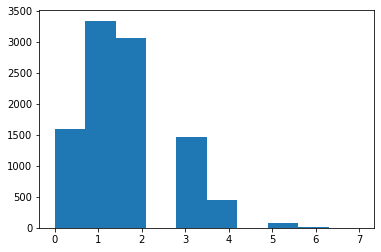

In [77]:
plt.hist(n_common_indices_vals)